In [1]:
# Data preprocessing and manipulation
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Image processing
from PIL import Image
import cv2

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Visualization
import matplotlib.pyplot as plt
#import seaborn as sns


from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.callbacks import LearningRateScheduler

from sklearn.utils.class_weight import compute_class_weight

In [2]:
# Function to invert colors (black to white and vice versa)
def invert_colors(image):
    return 255 - image

#  data augmentation parameters
datagen = ImageDataGenerator(
    zoom_range=0.03,
    width_shift_range=3,
    height_shift_range=3,
    rotation_range=2,
    preprocessing_function=invert_colors,  # Apply color inversion
    rescale=1./255,
    validation_split=0.20  # Split the data into training and validation sets
)

# path to dataset
dataset_path = 'final/data'

# image size
img_size = (64,64)


# data generator for training data
train_datagen = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    color_mode='rgb',  
    class_mode='categorical', 
    batch_size=32,
    subset='training'
)

#  data generator for validation data
valid_datagen = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    subset='validation'
)


Found 6304 images belonging to 344 classes.
Found 1576 images belonging to 344 classes.


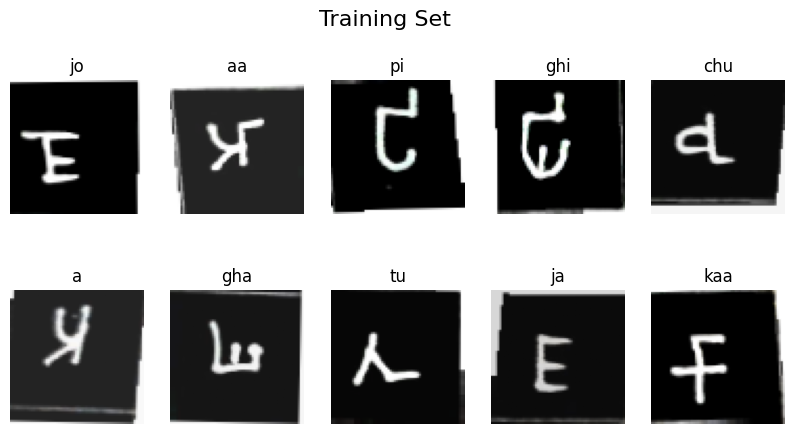

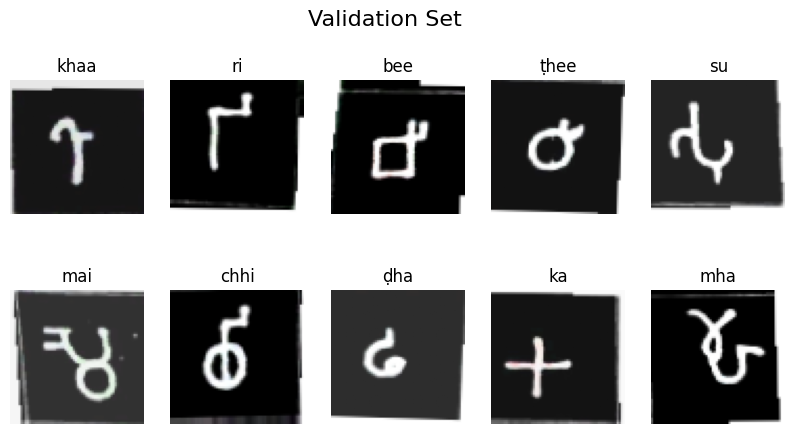

In [3]:
# Get class labels
class_labels = list(train_datagen.class_indices.keys())

# Plot images from the training set
plt.figure(figsize=(10, 5))
plt.suptitle('Training Set', fontsize=16)

for i in range(10):
    plt.subplot(2, 5, i + 1)
    
    # Get a batch of images and labels
    batch = train_datagen.next()
    image = batch[0][i]  # Get the ith image from the batch
    label_index = np.argmax(batch[1][i])  # Get the index of the label in one-hot encoding
    
    # Display the image
    plt.imshow(image.squeeze(), cmap='gray')
    plt.axis('off')
    
    # Display the pronunciation above the image
    plt.title(class_labels[label_index])

# Plot images from the validation set
plt.figure(figsize=(10, 5))
plt.suptitle('Validation Set', fontsize=16)

for i in range(10):
    plt.subplot(2, 5, i + 1)
    
    # Get a batch of images and labels from the validation set
    batch = valid_datagen.next()
    image = batch[0][i]
    label_index = np.argmax(batch[1][i])
    
    # Display the image
    plt.imshow(image.squeeze(), cmap='gray')
    plt.axis('off')
    
    # Display the pronunciation above the image
    plt.title(class_labels[label_index])

plt.show()


In [4]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('model.h5')

# Now, you can use the loaded_model for predictions or further training


In [5]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 62, 62, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 62, 62, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 29, 29, 128)       5

In [6]:
# Evaluate the restored model
loss, acc = loaded_model.evaluate(valid_datagen, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(loaded_model.predict(valid_datagen).shape)

50/50 - 8s - loss: 0.2278 - categorical_accuracy: 0.9239 - 8s/epoch - 155ms/step
Restored model, accuracy: 92.39%
50/50 [==============================] - 7s 133ms/step
(1576, 344)


1/1 [==============================] - 0s 31ms/step


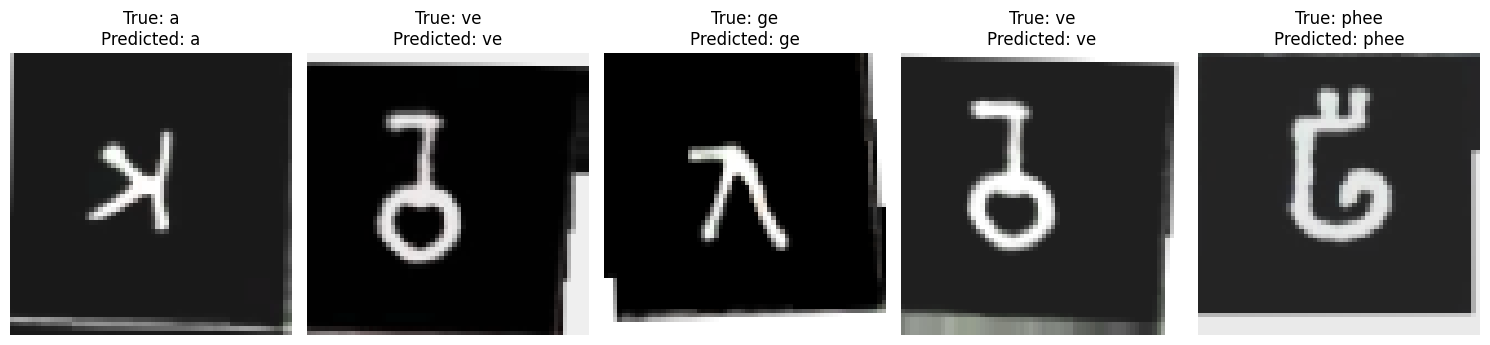

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'valid_datagen' is your validation ImageDataGenerator

# Get the total number of batches and batch size in the validation set
total_batches = len(valid_datagen)
batch_size = valid_datagen.batch_size

# Define the number of samples you want to display (change to 5)
num_samples = min(5, total_batches * batch_size)

# Retrieve class names from the data generator
class_names = list(valid_datagen.class_indices.keys())

# Create a subplot for each selected sample
plt.figure(figsize=(15, 4))  # Adjust the figure size
for i in range(num_samples):
    # Randomly choose a batch and an index within that batch
    batch_index = np.random.randint(total_batches)
    batch_data = valid_datagen[batch_index]

    # Get image and true label
    x, y = batch_data

    # Randomly choose an index within the batch
    index_within_batch = np.random.randint(batch_size)

    # Expand dimensions if needed (e.g., for grayscale images)
    x = np.squeeze(x[index_within_batch])

    # Get true and predicted labels using the loaded model
    true_label = class_names[np.argmax(y[index_within_batch])]
    predictions = loaded_model.predict(np.expand_dims(x, axis=0))  # Ensure correct shape for prediction
    predicted_label = class_names[np.argmax(predictions)]

    # Plot the image
    plt.subplot(1, 5, i + 1)  # Adjust the subplot layout
    plt.imshow(x, cmap='gray')  # Adjust cmap based on your image color format
    plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 33ms/step


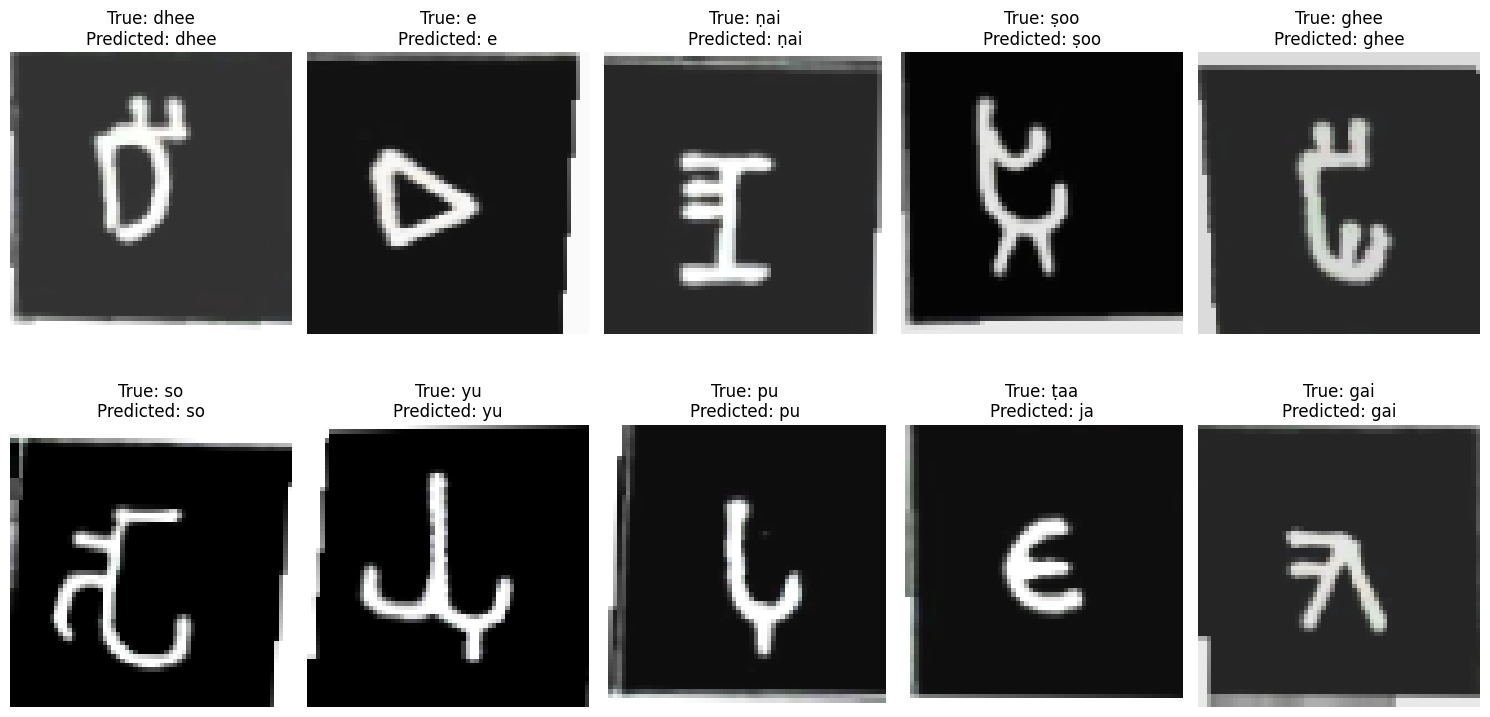

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'valid_datagen' is your validation ImageDataGenerator

# Get the total number of batches and batch size in the validation set
total_batches = len(valid_datagen)
batch_size = valid_datagen.batch_size

# Define the number of samples you want to display
num_samples = min(10, total_batches * batch_size)

# Retrieve class names from the data generator
class_names = list(valid_datagen.class_indices.keys())

# Create a subplot for each selected sample
plt.figure(figsize=(15, 8))
for i in range(num_samples):
    # Randomly choose a batch and an index within that batch
    batch_index = np.random.randint(total_batches)
    batch_data = valid_datagen[batch_index]

    # Get image and true label
    x, y = batch_data

    # Randomly choose an index within the batch
    index_within_batch = np.random.randint(batch_size)

    # Expand dimensions if needed (e.g., for grayscale images)
    x = np.squeeze(x[index_within_batch])

    # Get true and predicted labels using the loaded model
    true_label = class_names[np.argmax(y[index_within_batch])]
    predictions = loaded_model.predict(np.expand_dims(x, axis=0))  # Ensure correct shape for prediction
    predicted_label = class_names[np.argmax(predictions)]

    # Plot the image
    plt.subplot(2, 5, i + 1)
    plt.imshow(x, cmap='gray')  # Adjust cmap based on your image color format
    plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()
